# DATA ANALYSIS FOR STEADY STATE SIMULATED DATA (PIPELINE : VVSPL) (Trends : Multiple)

### 1. IMPORT NECESSARY LIBRARIES

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statistics as st
import math

### 2. PROVIDE DATA PATHS AND CONVERT TO A DATAFRAME

In [31]:
data_path = 'steady.csv'

df = pd.read_csv(data_path)

print("THIS IS THE FIRST 5 ROWS OF THE DATA\n", df.head())

print("THE NUMBER OF RECORDS ARE : ", len(df))

print("THE",len(df.columns) ,"COLUMNS OF THE DATA ARE : \n", '\n'.join(df.columns))

THIS IS THE FIRST 5 ROWS OF THE DATA
    Seconds        Timestamp_IST  S1-PT-1001A  10-PI-1110  S1-TT-1001A  \
0        0  2025-08-12 16:30:53    81.525495   94.059582    25.463019   
1        5  2025-08-12 16:30:58    81.531672   94.065790    25.453725   
2       10  2025-08-12 16:31:03    81.531354   94.049099    25.470918   
3       15  2025-08-12 16:31:08    81.532418   93.975287    25.455651   
4       20  2025-08-12 16:31:13    81.405468   93.980069    25.451016   

   10-TI-1103  S2-PT-1002A  S2-TT-1002A  20-PT-1312  S2-PT-1002B  ...  \
0   24.994202    16.110440    27.351981    4.998917    16.115449  ...   
1   25.005818    16.106241    27.330663    5.003575    16.107627  ...   
2   24.978400    16.103061    27.338960    5.003476    16.109046  ...   
3   25.025070    16.098854    27.331415    5.002732    16.104863  ...   
4   25.002667    16.122890    27.347044    4.998582    16.113627  ...   

   MOV_3018  11-PT-1203.1  TT-1201B.1  MOV_1206  MOV_3019  S1-PT-1001B.1  \
0       

### 3. THE DESCRIPTION OF DATA :

In [32]:
df.describe()

Seconds  S1-PT-1001A   10-PI-1110  S1-TT-1001A   10-TI-1103  \
count   8641.000000  8641.000000  8641.000000  8641.000000  8641.000000   
mean   21600.000000    81.516184    94.031277    25.457007    25.000048   
std    12472.930857     0.041010     0.048087     0.013003     0.012626   
min        0.000000    81.368060    93.855469    25.407916    24.951480   
25%    10800.000000    81.488623    93.999383    25.448249    24.991396   
50%    21600.000000    81.516057    94.030973    25.457091    25.000058   
75%    32400.000000    81.543373    94.064645    25.465814    25.008628   
max    43200.000000    81.673162    94.235807    25.510942    25.053641   

       S2-PT-1002A  S2-TT-1002A   20-PT-1312  S2-PT-1002B        20-TE  ...  \
count  8641.000000  8641.000000  8641.000000  8641.000000  8641.000000  ...   
mean     16.106358    27.340418     5.001796    16.105734    27.592577  ...   
std       0.008179     0.013862     0.002547     0.008270     0.014047  ...   
min      16.072948    27.289903     4.991327    16.073253    27.541874  ...   
25%      16.100892    27.330977     5.000058    16.100118    27.583352  ...   
50%      16.106265    27.340369     5.001774    16.105751    27.592359  ...   
75%      16.111900    27.349890     5.003501    16.111339    27.602148  ...   
max      16.135113    27.395008     5.011922    16.142788    27.644921  ...   

       MOV_3018  11-PT-1203.1   TT-1201B.1  MOV_1206  MOV_3019  S1-PT-1001B.1  \
count    8641.0   8641.000000  8641.000000    8641.0    8641.0    8641.000000   
mean        1.0     48.453739    26.503230       1.0       1.0      81.515191   
std         0.0      0.024706     0.013480       0.0       0.0       0.041519   
min         1.0     48.367274    26.438872       1.0       1.0      81.361415   
25%         1.0     48.437135    26.494351       1.0       1.0      81.487100   
50%         1.0     48.453942    26.503162       1.0       1.0      81.515216   
75%         1.0     48.470437    26.512123       1.0       1.0      81.543089   
max         1.0     48.542302    26.553496       1.0       1.0      81.682941   

       S1-TT-1001B.1  S2-PT-1002B.1  S2-TT-1002B.1  20-MOV-1304  
count    8641.000000    8641.000000    8641.000000       8641.0  
mean       25.456798      16.105711      27.340806          1.0  
std         0.012909       0.008185       0.013977          0.0  
min        25.408205      16.076009      27.285194          1.0  
25%        25.448155      16.100107      27.331452          1.0  
50%        25.456808      16.105716      27.340840          1.0  
75%        25.465590      16.111323      27.350179          1.0  
max        25.503120      16.136302      27.398760          1.0  

[8 rows x 66 columns]

## 4. PLOTTING A PRESSURE TREND ACROSS TIME

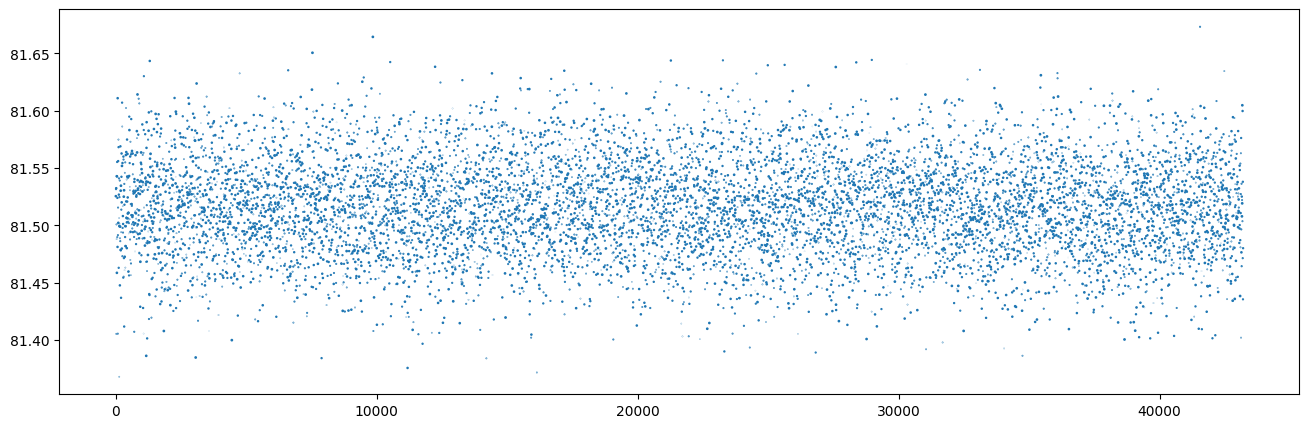

THE STANDARD DEVIATION OF THE PRESSURE TREND :  0.041007772108197935
THE MEAN OF THE PRESSURE TREND IS  : 81.51618447421274
THE MIN, MAX DIFF OF THE PRESSURE TREND IS : 0.3051014857277039


In [33]:
trend = 'S1-PT-1001A'

y = df[trend]
x = df['Seconds']
c = np.random.random(len(df))

plt.figure(figsize=(16, 5))
plt.scatter(x, y, c)

plt.show()

print("THE STANDARD DEVIATION OF THE PRESSURE TREND : ", np.std(y))

print(f"THE MEAN OF THE PRESSURE TREND IS  : {np.mean(y)}")

print(f"THE MIN, MAX DIFF OF THE PRESSURE TREND IS : {-min(y) + max(y)}")

## 5. PLOTTING THE 'rolling' TREND

Because, nothing groundbreaking has been derieved from the above plot except a few stats have been derieved form the above trend we'll try plotting the rolling from the mean for every reading

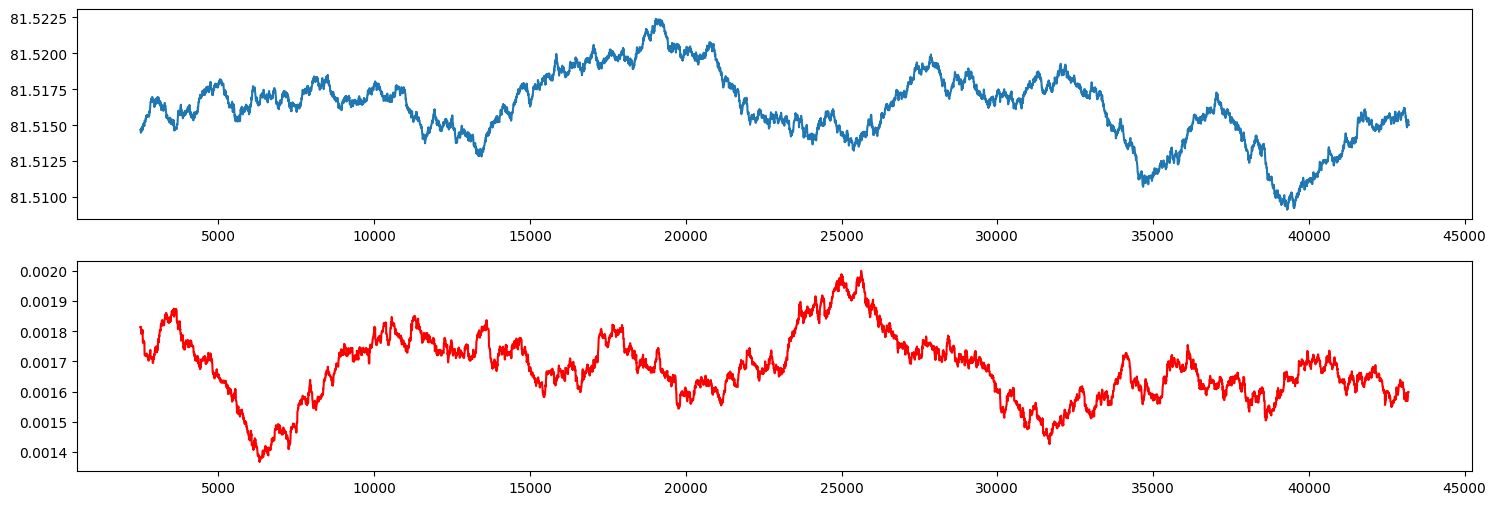

In [34]:
y_mean = df[trend].rolling(window= 500).mean()
y_var = df[trend].rolling(window= 500).var()
x = df['Seconds']

fig, ax = plt.subplots(2, 1, figsize=(18,6)) # 2 row, 1 cols
ax[0].plot(x, y_mean)
ax[1].plot(x, y_var, color = 'red')


## MOVING AVERAGES (same as above)

1641

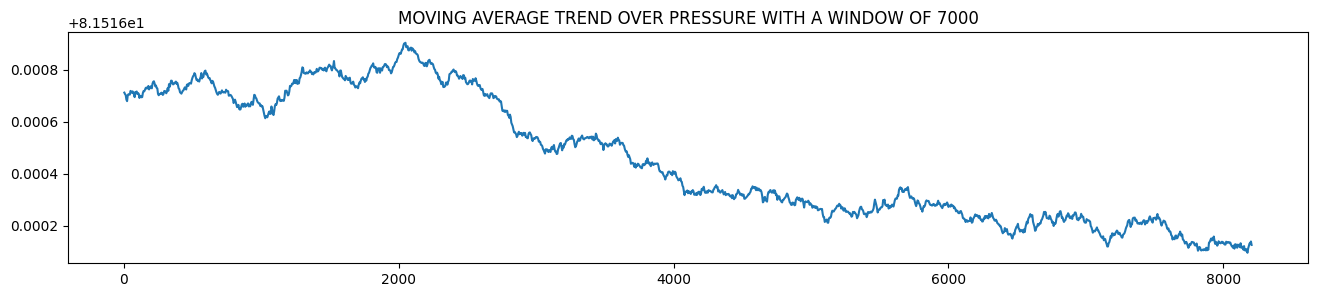

In [35]:
# # Because Df type removes first len of win_size elements, We'll write our own logic so that most data values are not missed when window size is large 
# # (large win size enables better trned analysis)

window_size = 7000

mv_avg = []
time = []
i = 0
while i + window_size < len(y):
    mv_avg.append(y[i : i + window_size].mean())
    time.append((i + 1) * 5 )
    i = i + 1

plt.figure(figsize=(16, 3))
plt.plot(time, mv_avg)
plt.title(f"MOVING AVERAGE TREND OVER PRESSURE WITH A WINDOW OF {window_size}")
len(mv_avg)


### ROC

Text(0, 0, 'MEAN ROC : -0.000001049996')

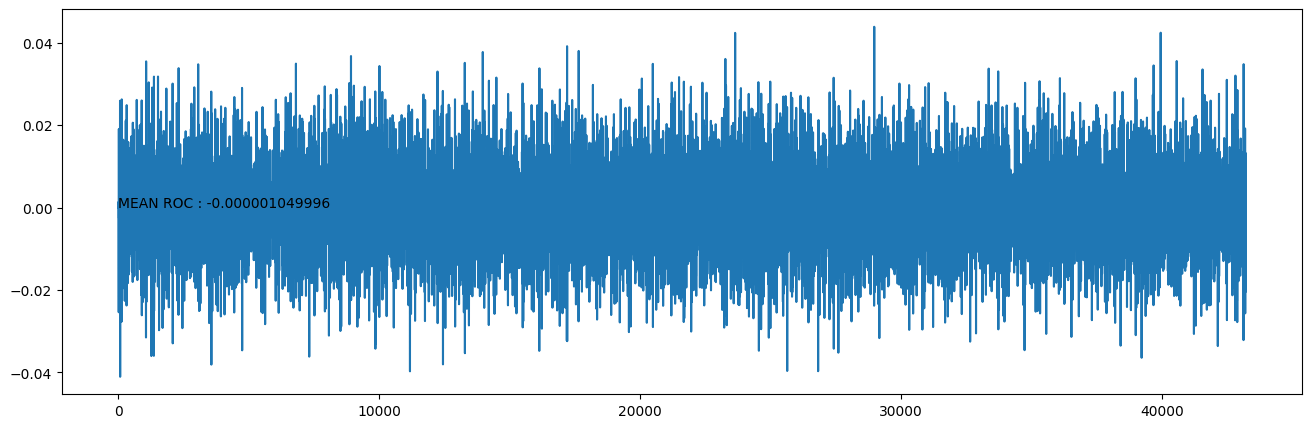

In [36]:
roc = np.diff(y)/5
time = x[1:]

plt.figure(figsize=(16, 5))
plt.plot(time, roc)

plt.text(0, 0, f"MEAN ROC : {np.mean(roc):.12f}")

1641

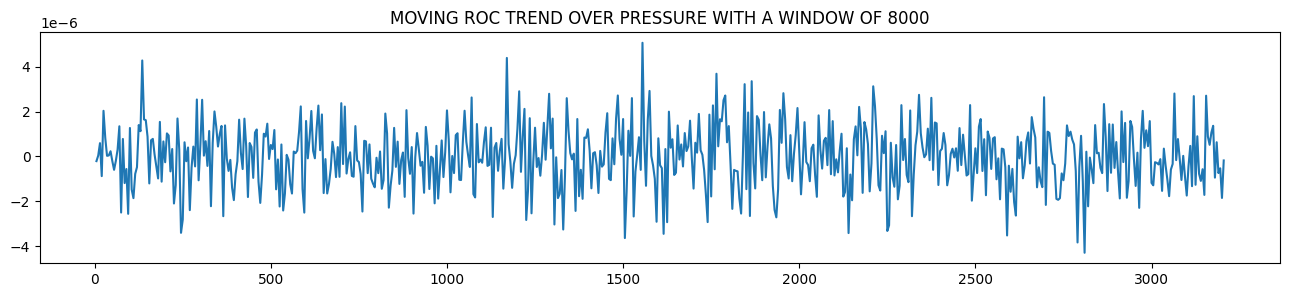

In [37]:
# mv roc
window_size = 8000

mv_roc = []
time = []
i = 0
while i + window_size < len(y):
    mv_roc.append(roc[i : i + window_size].mean())
    time.append((i + 1) * 5 )
    i = i + 1

plt.figure(figsize=(16, 3))
plt.plot(time, mv_roc)
plt.title(f"MOVING ROC TREND OVER PRESSURE WITH A WINDOW OF {window_size}")
len(mv_avg)

### BOX PLT AND OUTLIER

In [38]:
y = np.array(y) 

Q1 = np.percentile(y, 25)  
Q3 = np.percentile(y, 75)  
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = y[(y < lower_bound) | (y > upper_bound)]
print("Outliers:", outliers)

Outliers: [81.40546812 81.40564569 81.36806019 81.40570386 81.63008462 81.38632185
 81.40150643 81.64336793 81.38486509 81.3999952  81.63255334 81.63523603
 81.65050446 81.38430722 81.62898079 81.664347   81.6423993  81.37575388
 81.4051306  81.39685469 81.40640422 81.6383005  81.40628823 81.62663302
 81.38411943 81.63255505 81.62844157 81.40216709 81.40484131 81.3718027
 81.62770926 81.63486776 81.40056052 81.64374334 81.40323706 81.40334767
 81.40084448 81.64390668 81.39015175 81.40569847 81.39355794 81.63235896
 81.63961404 81.63994102 81.40548555 81.38919288 81.63808146 81.64212403
 81.40096141 81.64427555 81.64071791 81.39204029 81.39797717 81.62721107
 81.63561595 81.39276037 81.38638739 81.63091664 81.63275351 81.62824858
 81.40058146 81.40256137 81.40155731 81.40644657 81.40369359 81.67316167
 81.4016244  81.40425074 81.63453658 81.40216983]


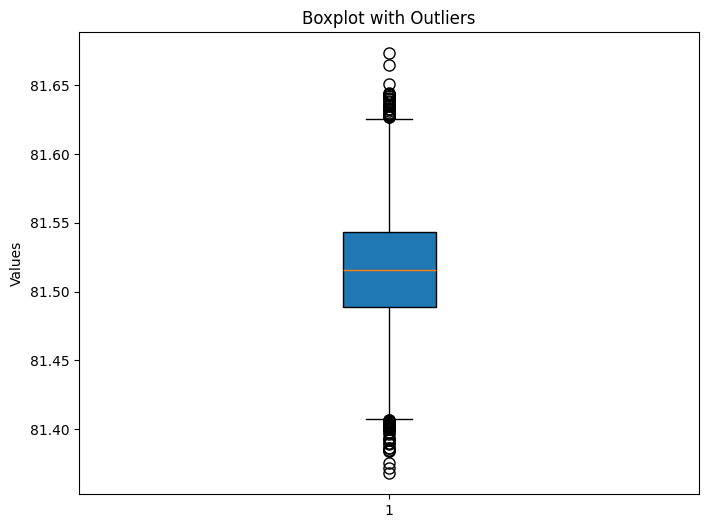

In [39]:

plt.figure(figsize=(8, 6))
plt.boxplot(y, vert=True, patch_artist=True, flierprops=dict(marker='o', color='red', markersize=8))
plt.title("Boxplot with Outliers")
plt.ylabel("Values")
plt.show()


## 6 . PLOTTING THE Smoothed Curve trend

In [40]:

x_spline = np.linspace(x.min(), x.max(), 150)

model = scipy.interpolate.make_interp_spline(x, y, k=)
y_spline = model(x_spline)

checky_sin = np.multiply(np.sqrt(([np.mean(y)] * len(x_spline) ) +  (np.sin(0.9* x_spline) * np.std(y) * 2.3)), np.sqrt((x_spline)))

plt.figure(figsize=(16, 5))
plt.plot(x_spline, y_spline, color='red', linewidth=2)
plt.plot(x_spline, checky_sin, color='black')
plt.scatter(x, y, c)
plt.title(f'Smooth Curve using Cubic Spline with a period of  {len(x_spline)}')
plt.show()

final_function = np.multiply(np.sqrt(([np.mean(y)] * len(x) ) +  (np.sin(0.9 * x) * np.std(y) * 2.3)), np.sqrt(model(x)))




SyntaxError: invalid syntax (2791229858.py, line 3)

In [ ]:
print(f"RMSE between spline and custom function: {np.sqrt(np.mean((y_spline - checky_sin)**2))}")
print(f"RMSE between actual data and custom function: {np.sqrt(np.mean((final_function - y)**2))}")
print(f"RMSE between spline and actual data: {np.sqrt(np.mean((spline_function - y)**2))}")

# Standard deviations
print(f"STD of custom function: {np.std(checky_sin)}")
print(f"STD of spline: {np.std(y_spline)}")
print(f"STD of actual data: {np.std(y)}")

RMSE between spline and custom function: 1250.519651674243
RMSE between actual data and custom function: 0.03898159779399313


NameError: name 'spline_function' is not defined

t=55, y_actual=81.5553, y_pred=81.4475, error=0.107770
Current function: f(t) = 81.5060 + sin(0.9000*t) * 0.0422 * 2.0000
Current parameters: A=0.9000, B=2.0000
--------------------------------------------------
t=60, y_actual=81.4898, y_pred=81.4628, error=0.026985
Current function: f(t) = 81.5105 + sin(0.8999*t) * 0.0426 * 2.0000
Current parameters: A=0.8999, B=2.0000
--------------------------------------------------
t=65, y_actual=81.5240, y_pred=81.5855, error=-0.061500
Current function: f(t) = 81.5087 + sin(0.9000*t) * 0.0412 * 2.0000
Current parameters: A=0.9000, B=2.0000
--------------------------------------------------
t=70, y_actual=81.4812, y_pred=81.5233, error=-0.042016
Current function: f(t) = 81.5099 + sin(0.9000*t) * 0.0398 * 2.0000
Current parameters: A=0.9000, B=2.0000
--------------------------------------------------
t=75, y_actual=81.6109, y_pred=81.4298, error=0.181100
Current function: f(t) = 81.5079 + sin(0.9000*t) * 0.0391 * 2.0000
Current parameters: A=0.9000

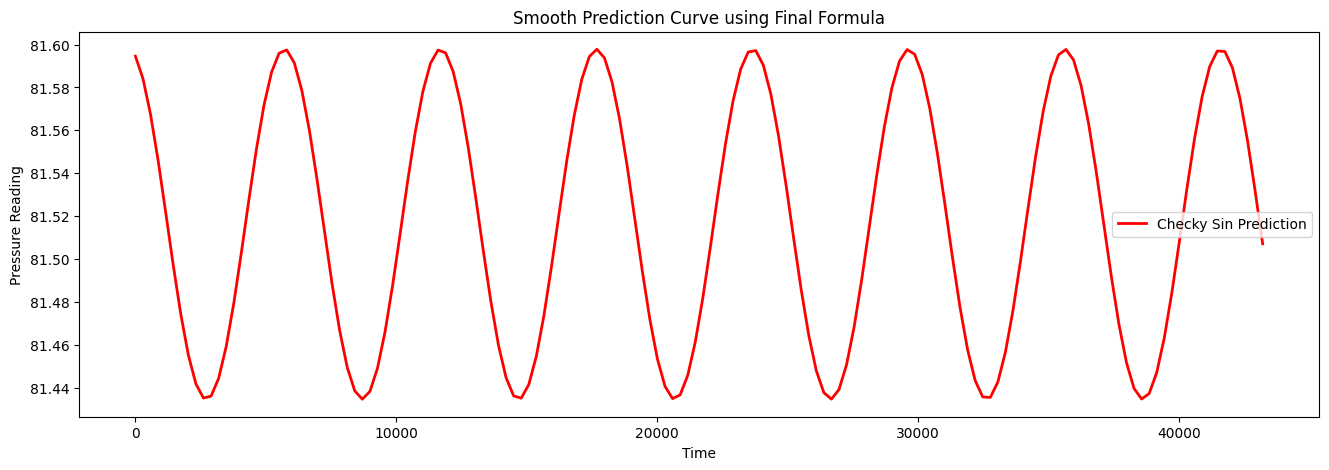

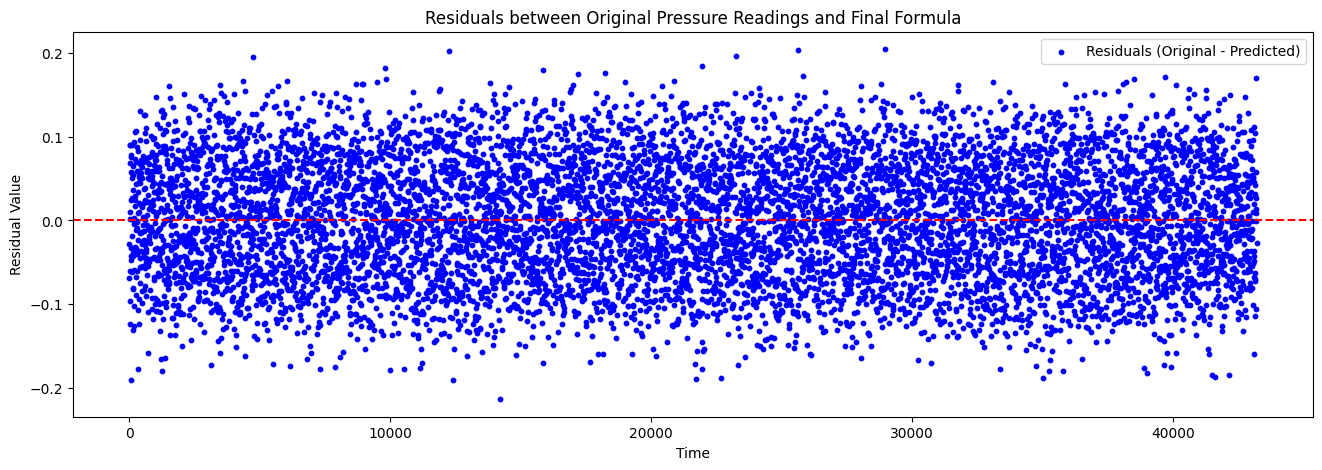

In [ ]:
import numpy as np

class CheckySinPredictor:
    def __init__(self, y_init, A=0.9, B=2.0, lr=0.001, noise_factor=1.5):
        self.y_history = list(y_init)
        self.A = A
        self.B = B
        self.lr = lr
        self.noise_factor = noise_factor

    def predict(self, t):
        mean_prev = np.mean(self.y_history)
        std_prev = np.std(self.y_history)
        return mean_prev + np.sin(self.A * t) * std_prev * self.B

    def update(self, t, y_actual):
        y_pred = self.predict(t)
        error = y_actual - y_pred
        mean_prev = np.mean(self.y_history)
        std_prev = np.std(self.y_history)
        osc_mag = np.abs(np.sin(self.A * t) * std_prev * self.B)

        # Only update A and B if error is significant but not noise
        if np.abs(error) < self.noise_factor * osc_mag:
            # Gradient-like update
            dA = error * np.cos(self.A * t) * t * std_prev * self.B
            dB = error * np.sin(self.A * t) * std_prev

            self.A += self.lr * dA
            self.B += self.lr * dB

        # Append new value to history
        self.y_history.append(y_actual)

        func_str = f"f(t) = {mean_prev:.4f} + sin({self.A:.4f}*t) * {std_prev:.4f} * {self.B:.4f}"
        return y_pred, error, self.A, self.B, func_str

# --- Your data ---
# y = your pressure readings array of length 8461
# Example: for now let's assume y is loaded as np.array([...])
# x = time array starting from 5, with step 5
x = np.arange(5, 5 + 5*len(y), 5)

# Initialize predictor with first 10 readings
predictor = CheckySinPredictor(y[:10], A=0.9, B=2.0, lr=0.001)

preds = []
errors = []

for t_idx in range(10, len(y)):
    t_val = x[t_idx]
    y_actual = y[t_idx]

    y_pred, error, A_curr, B_curr, func_str = predictor.update(t_val, y_actual)
    preds.append(y_pred)
    errors.append(error)

    # Print info at each iteration
    print(f"t={t_val}, y_actual={y_actual:.4f}, y_pred={y_pred:.4f}, error={error:.6f}")
    print(f"Current function: {func_str}")
    print(f"Current parameters: A={A_curr:.4f}, B={B_curr:.4f}")
    print("-"*50)

# Final RMSE
final_rmse = np.sqrt(np.mean(np.array(errors)**2))
print(f"\nFinal RMSE over all predictions: {final_rmse:.6f}")
print(f"Final prediction for last value: {preds[-1]:.4f}, Actual: {y[-1]:.4f}")

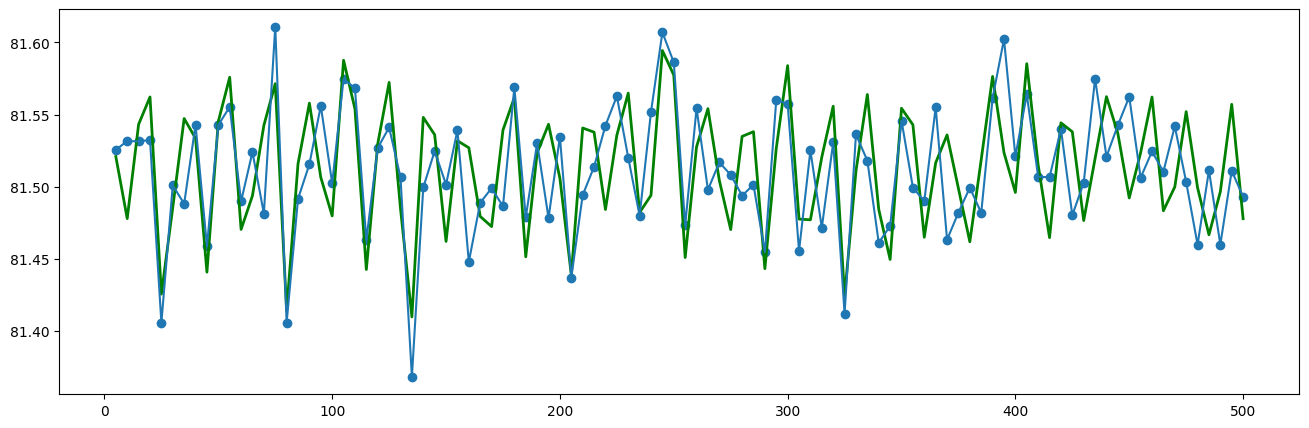

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(x[:100], final_function[:100], color='green', linewidth=2)
plt.scatter(x[:100], y[:100])
plt.plot(x[:100], y[:100])


## 7. BATCH AVERAGING PLOTS

Text(0.5, 1.0, 'NUMBER OF BATCH IS : 173')

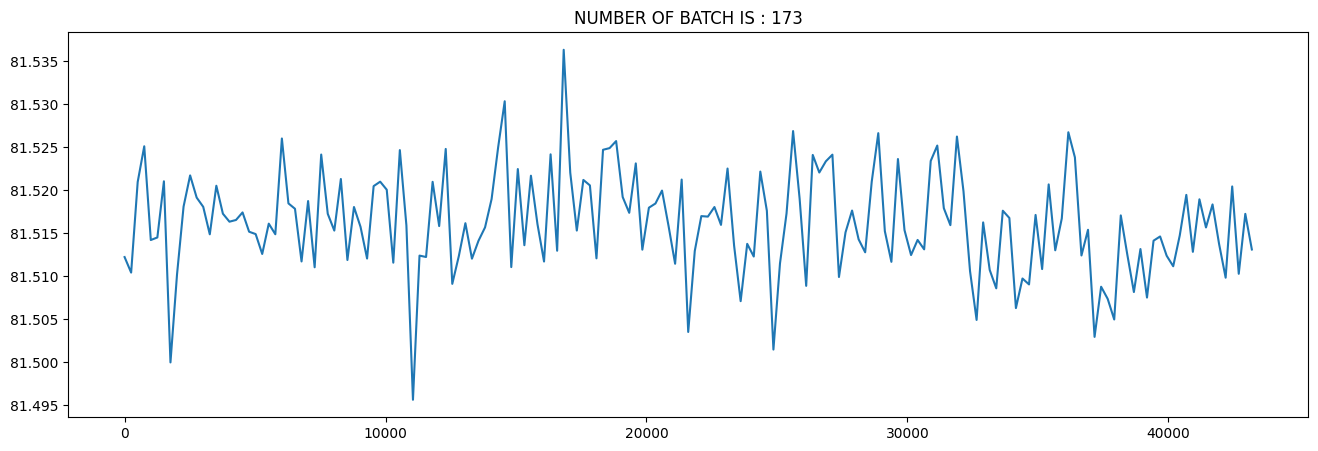

In [ ]:
# PARAMETER = MEAN / AVERAGE
batch = 50
mean_interval = []
i = 0
while i < len(y):
    mean_interval.append(np.mean(y[i : i + batch]))
    i = i + batch

x_dis = np.linspace(x.min(), x.max(), len(x) // batch + 1)
plt.figure(figsize=(16, 5))
plt.plot(x_dis, mean_interval)
plt.title(f"NUMBER OF BATCH IS : {len(x) // batch + 1}")

### INSIGHTS : The analysis until now has been done on a univariate feature. no inference is donw ith correlation wrt to each other. We can deduce that the senor readings are often ossciallating between a range with high freqnecy wrt to time periods, thus a 'THRESHOLD' with an account of previous data can be taken to detect any problems univariately if a single data feed is given, i.e either a rolling window or a LSTM based technique, using which we could adjust the threshold values accordingly. NOTE THAT THIS INFERENCE IS DONE AND MIGHT BE ONLY VALID FOR SINGLE STATE

## PART 2 : MULTIVARIATE ANALYSIS & INFERENCE

In [ ]:
# BASED ON Pipeline Lookup of VVSPL

# for pipe VISHAKA_SV1, the sensor at UpPressure is 10-PI-1110 and the DownPressure is S1-PT-1001A
# for pipe SV1_CP4, the sensors at UpPRessure is S1-PT-1001B and the DownPressure is C4-PI-1016
# for pipe VISHAKA_SV1, the sensor at UpTemp is 10-TI-1103 and the DownTemp is S1-TT-1001A
# for pipe IPS1_CP7, the sensor at UpPressure is 11-PT-1203 and the DownPressure is 67-PI-1016
# for SV2_RAJAMUNDRY, S2-PT-1002B, 20-PT-1312
# for SV2_RAJAMUNDRY, S2-TT-1002B, 20-TE-1310
# for CP8_SV2, C8-PI-1016, S2-PT-1002A [NDS] and onlt ,S2-TT-1002A
# SV2_RAJAMUNDRY IS THE LAST STATION AND SV1_VISHKA IS FIRST


### 1. GIVE VARS AND SET PARAMS

In [ ]:
up_sv1 = df['10-PI-1110']
down_sv1 = df['S1-PT-1001A']

up_sv2 = df['S2-PT-1002A']
down_sv2 = df['20-PT-1312']


### 2. PLOT Up_Pressure vs Down_Pressure

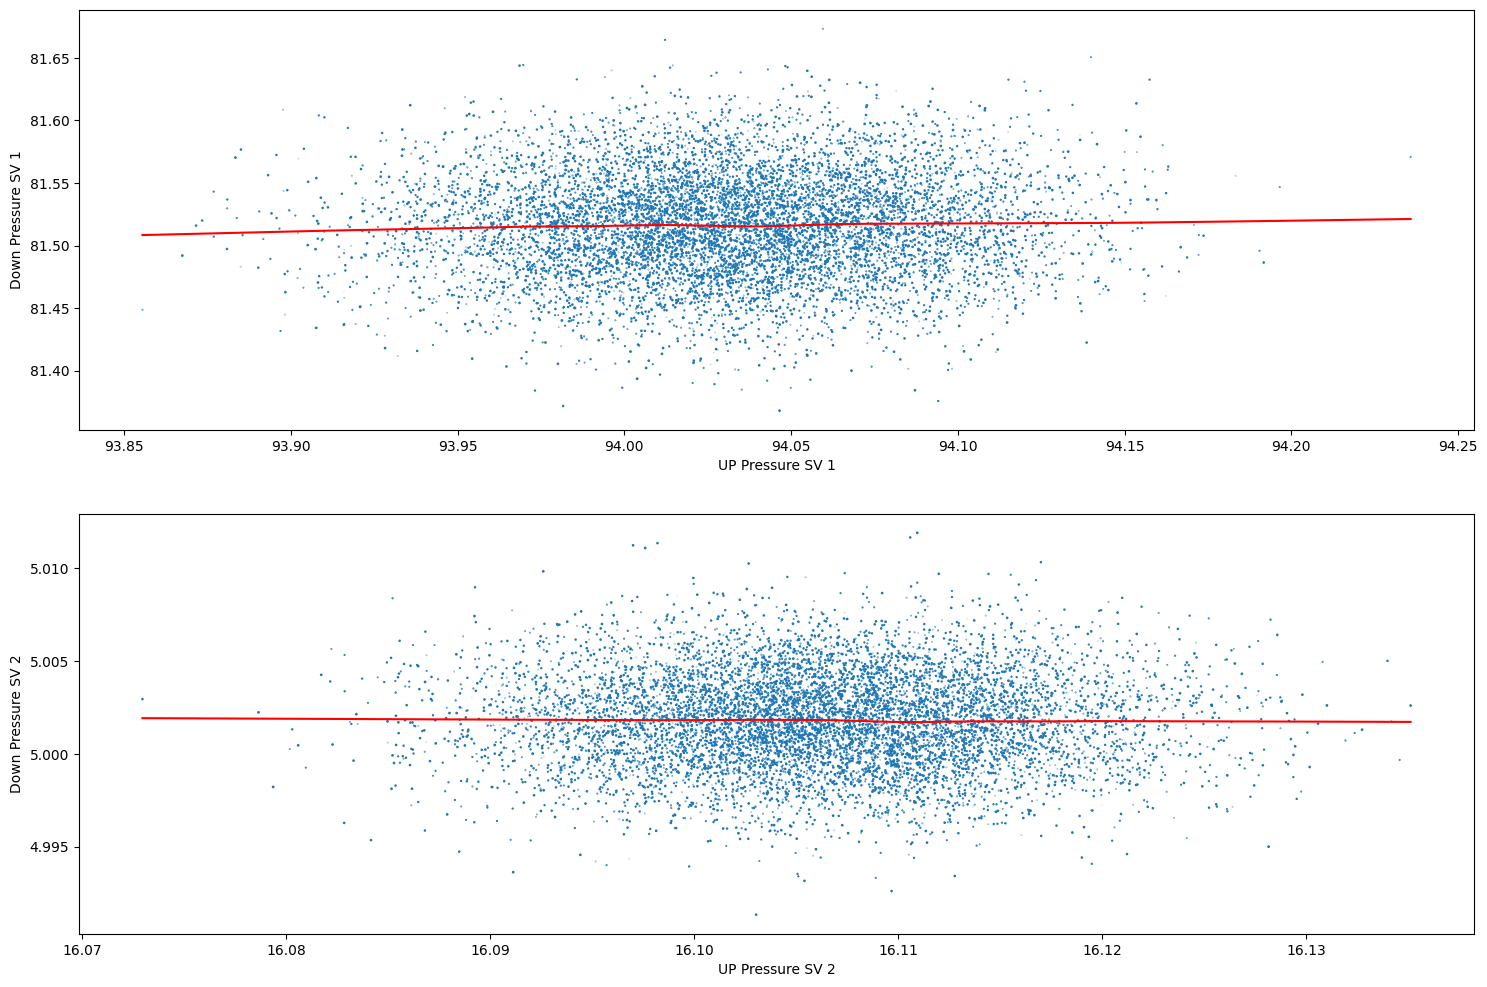

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
ax[0].scatter(up_sv1, down_sv1, c)
ax[0].set_xlabel("UP Pressure SV 1")
ax[0].set_ylabel("Down Pressure SV 1")

ax[1].scatter(up_sv2, down_sv2, c)
ax[1].set_xlabel("UP Pressure SV 2")
ax[1].set_ylabel("Down Pressure SV 2")

# sv1_spline = scipy.interpolate.make_interp_spline(up_sv1, down_sv1, k = 100)
# sv2_spline = scipy.interpolate.make_interp_spline(up_sv2, down_sv2, k = 100)
# up_sv1_spline = np.linspace(up_sv1.min(), up_sv1.max(), 300)
# up_sv2_spline = np.linspace(up_sv2.min(), up_sv2.max(), 300)

# down_sv1_spline = sv1_spline(up_sv1_spline)
# down_sv2_spline = sv2_spline(up_sv2_spline)

# ax[0].plot(up_sv1_spline, down_sv1_spline)
# ax[1].plot(up_sv2_spline, down_sv2_spline)

import statsmodels.api as sm

lowess1 = sm.nonparametric.lowess(down_sv1, up_sv1, frac=0.5)
lowess2 = sm.nonparametric.lowess(down_sv2, up_sv2, frac=0.5)


ax[0].plot(lowess1[:,0], lowess1[:,1], color='red')
ax[1].plot(lowess2[:,0], lowess2[:,1], color='red')


### 3. Pressures wrt to Time

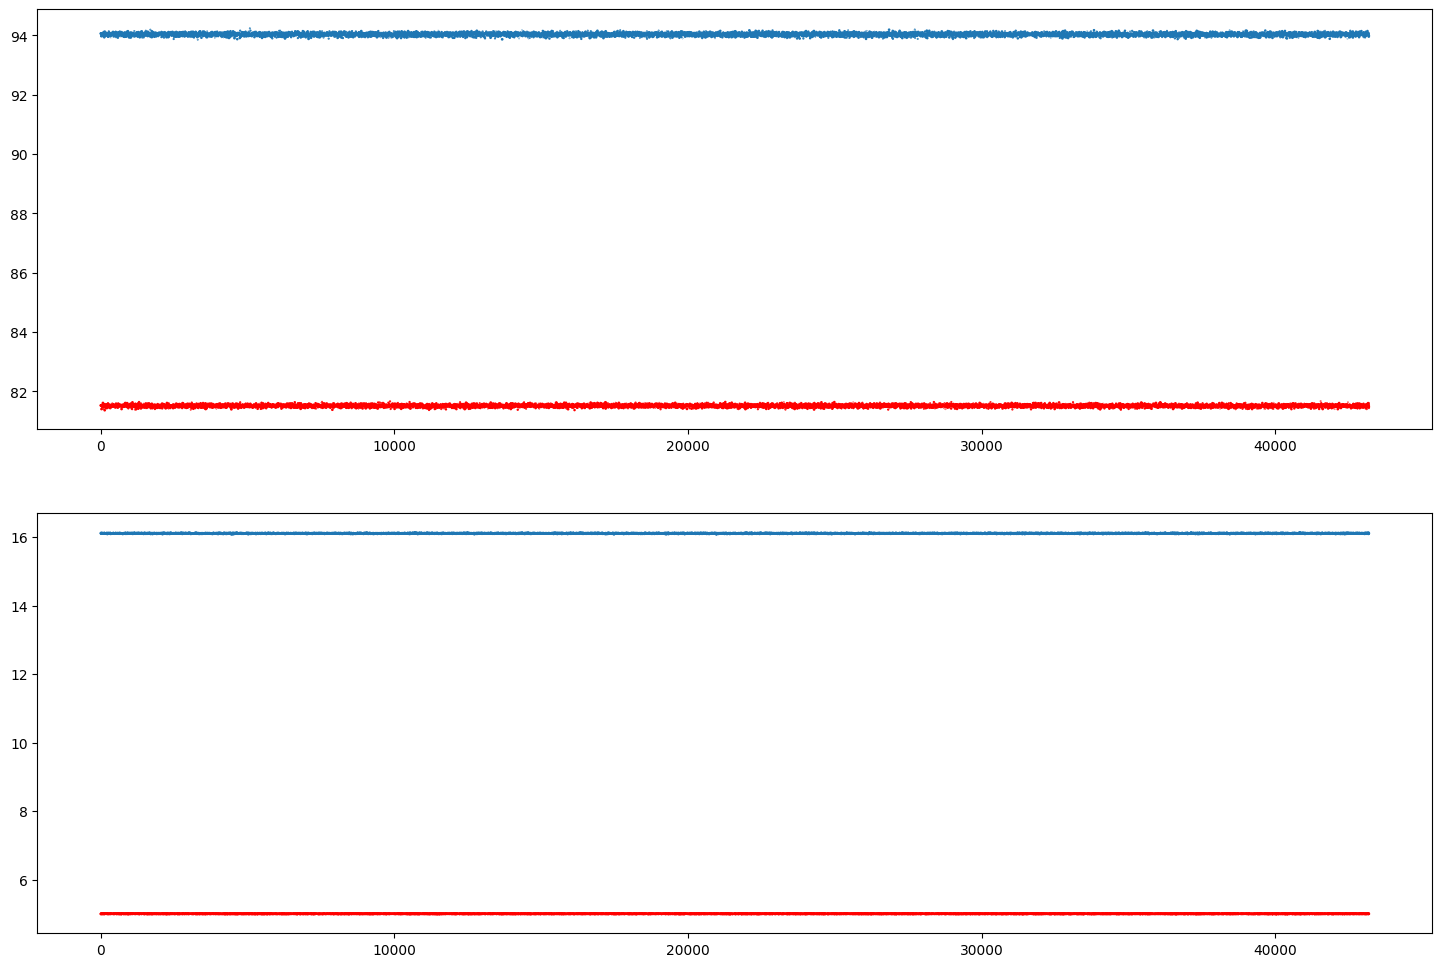

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1, c)
ax[0].scatter(x, down_sv1, c,  color= 'red')

ax[1].scatter(x, up_sv2, c)
ax[1].scatter(x, down_sv2, c, color= 'red')

### PLOTS of PRESSURE_ROLLING

In [ ]:
up_sv1_r = df['10-PI-1110'].rolling(window=1000).mean()
down_sv1_r = df['S1-PT-1001A'].rolling(window=1000).mean()

up_sv2_r = df['S2-PT-1002A'].rolling(window=1000).mean()
down_sv2_r = df['20-PT-1312'].rolling(window=1000).mean()

len(up_sv1_r)

8641

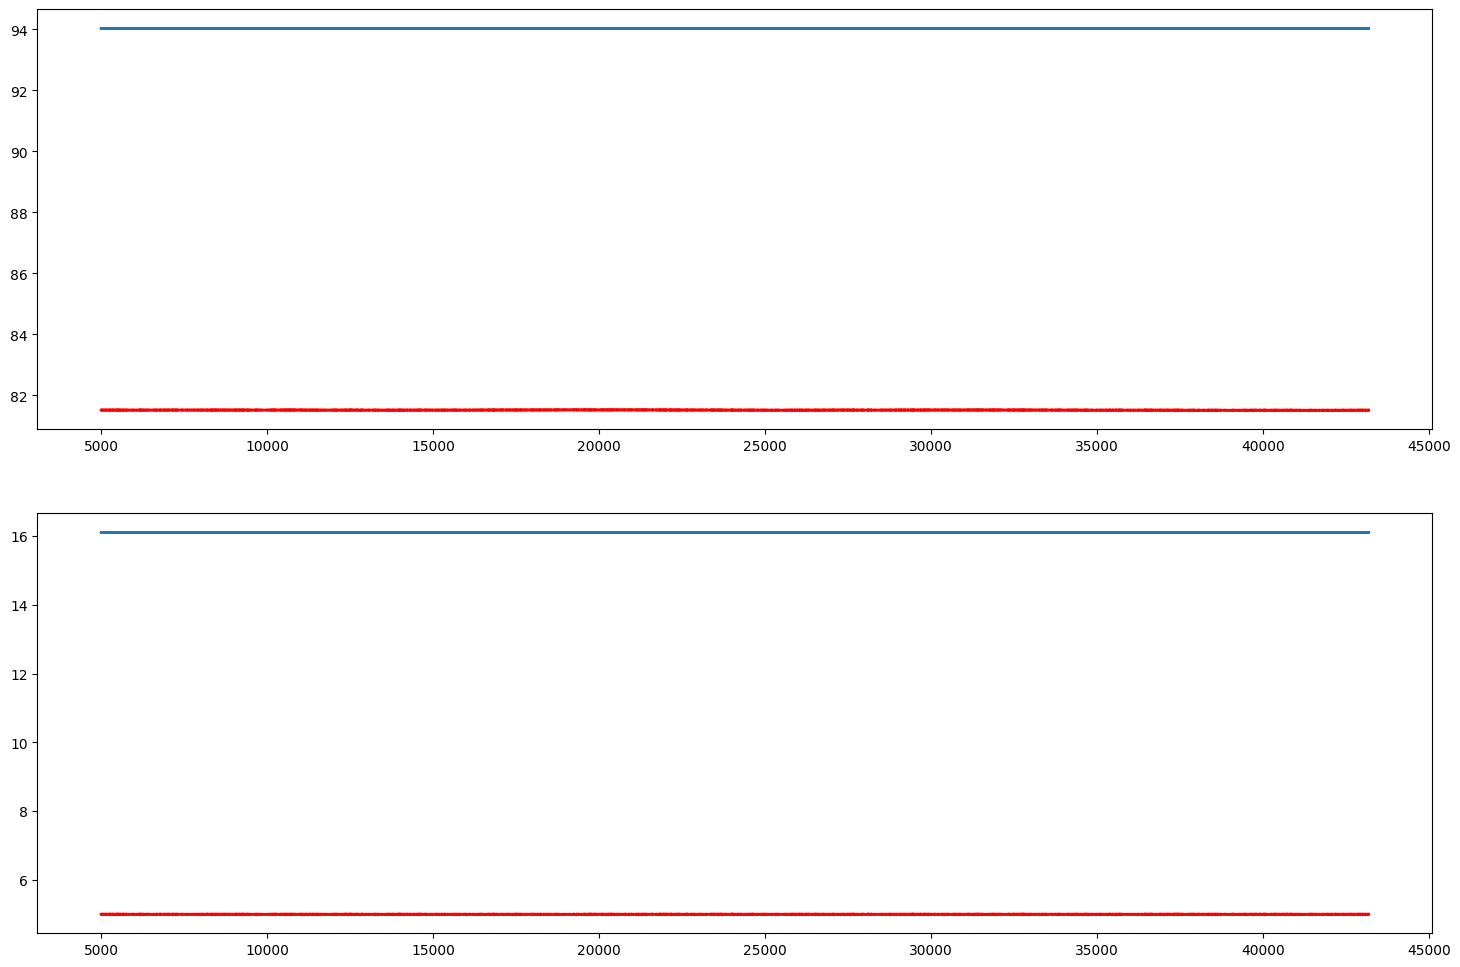

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1_r, c)
ax[0].scatter(x, down_sv1_r, c,  color= 'red')

ax[1].scatter(x, up_sv2_r, c)
ax[1].scatter(x, down_sv2_r, c, color= 'red')

### 4. SBS COMPARISION OF END AND START PRESSURES (REV) [ROLLING]

DIFFERENCE IN MENS BETWWEN SV_1 UP AND DOWN PRESSURES :  12.51509296501876
DIFFERENCE IN MENS BETWWEN SV_2 UP AND DOWN PRESSURES :  11.104561771137595


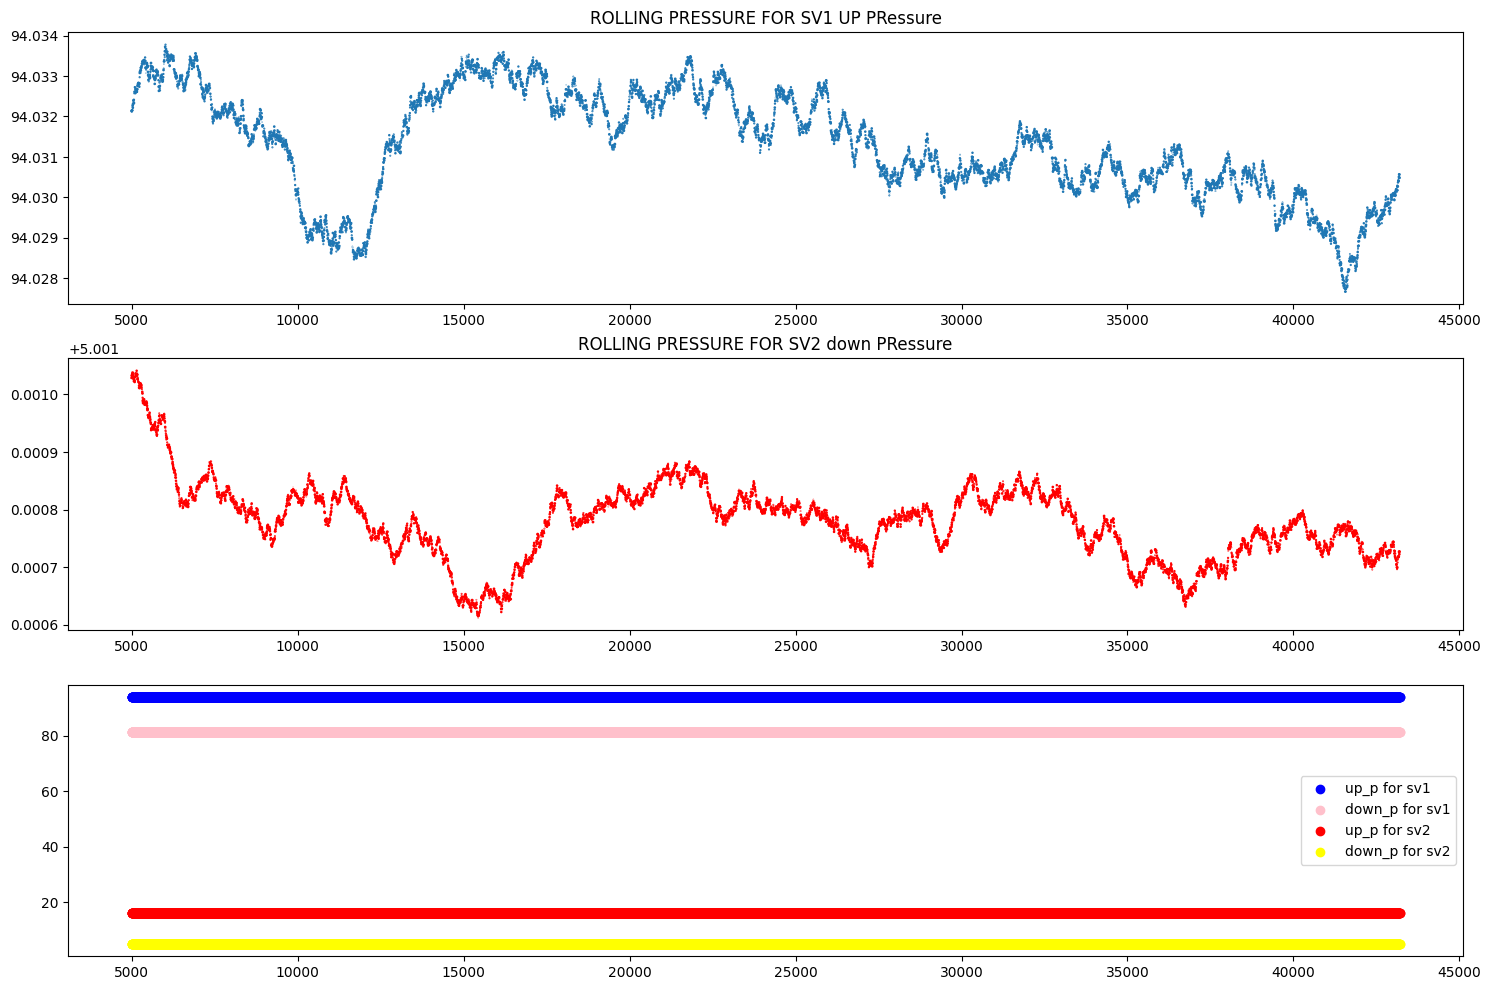

In [ ]:

fig, ax = plt.subplots(3, 1, figsize=(18,12))


ax[0].scatter(x, up_sv1_r, c)
ax[0].set_title("ROLLING PRESSURE FOR SV1 UP PRessure")

ax[1].scatter(x, down_sv2_r, c, color= 'red')
ax[1].set_title("ROLLING PRESSURE FOR SV2 down PRessure")

ax[2].scatter(x, up_sv1_r, color='blue', label= 'up_p for sv1')
ax[2].scatter(x, down_sv1_r, color='pink', label= 'down_p for sv1')
ax[2].scatter(x, up_sv2_r, color = 'red', label= 'up_p for sv2')
ax[2].scatter(x, down_sv2_r, color = 'yellow', label= 'down_p for sv2')
ax[2].legend()

print("DIFFERENCE IN MENS BETWWEN SV_1 UP AND DOWN PRESSURES : ", np.mean(up_sv1 - down_sv1))
print("DIFFERENCE IN MENS BETWWEN SV_2 UP AND DOWN PRESSURES : ", np.mean(up_sv2 - down_sv2))

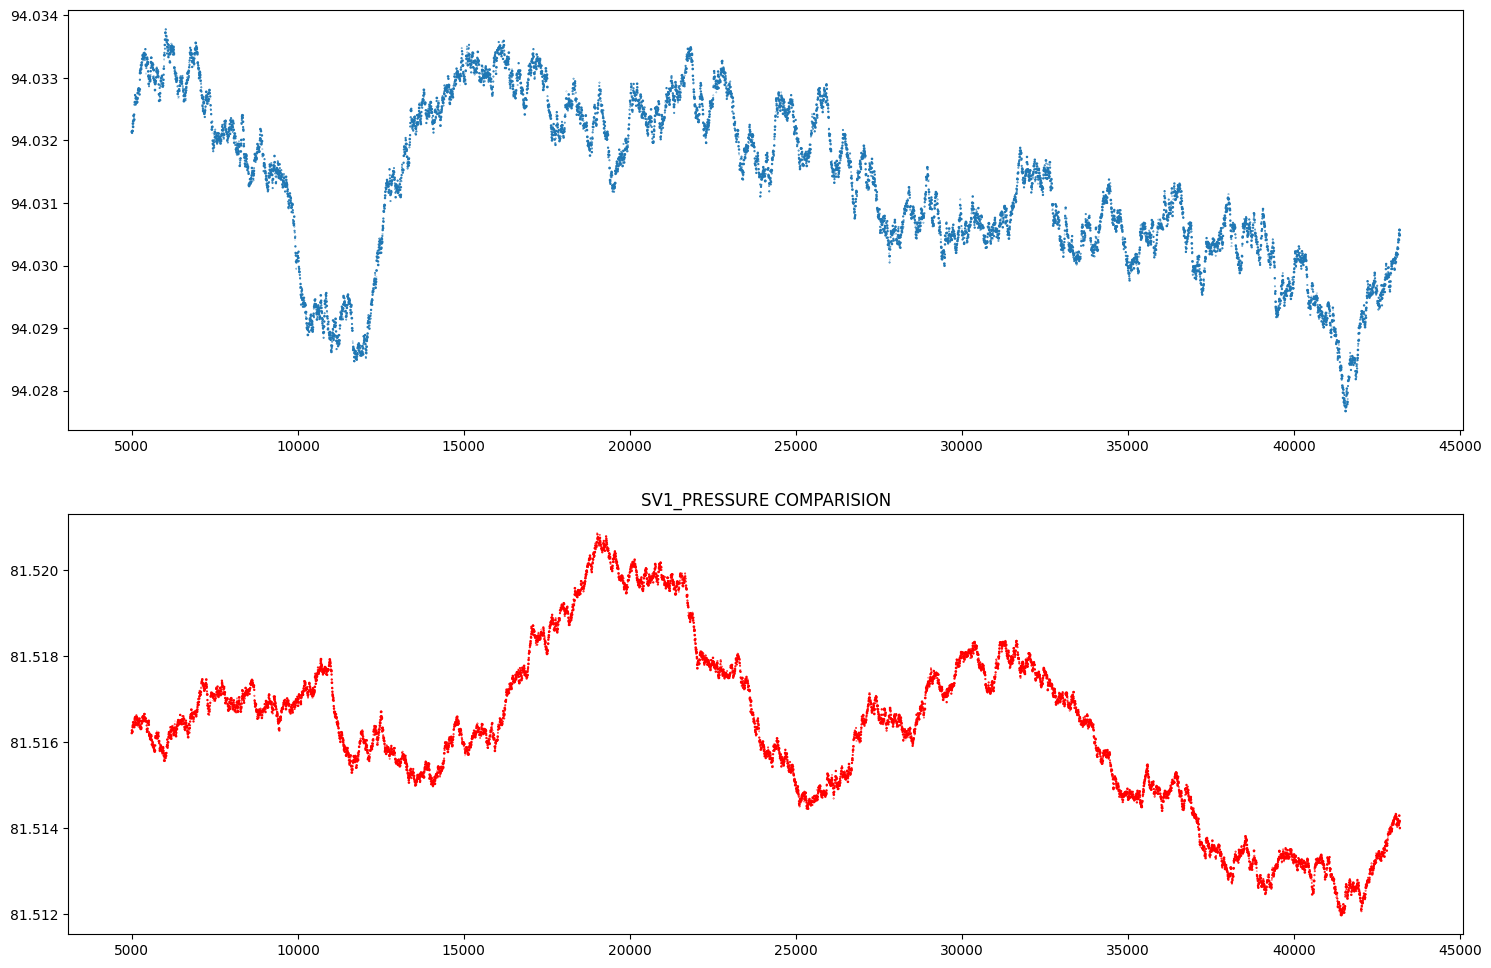

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
plt.title("SV1_PRESSURE COMPARISION")
ax[0].scatter(x, up_sv1_r, c)
ax[1].scatter(x, down_sv1_r, c,  color= 'red')


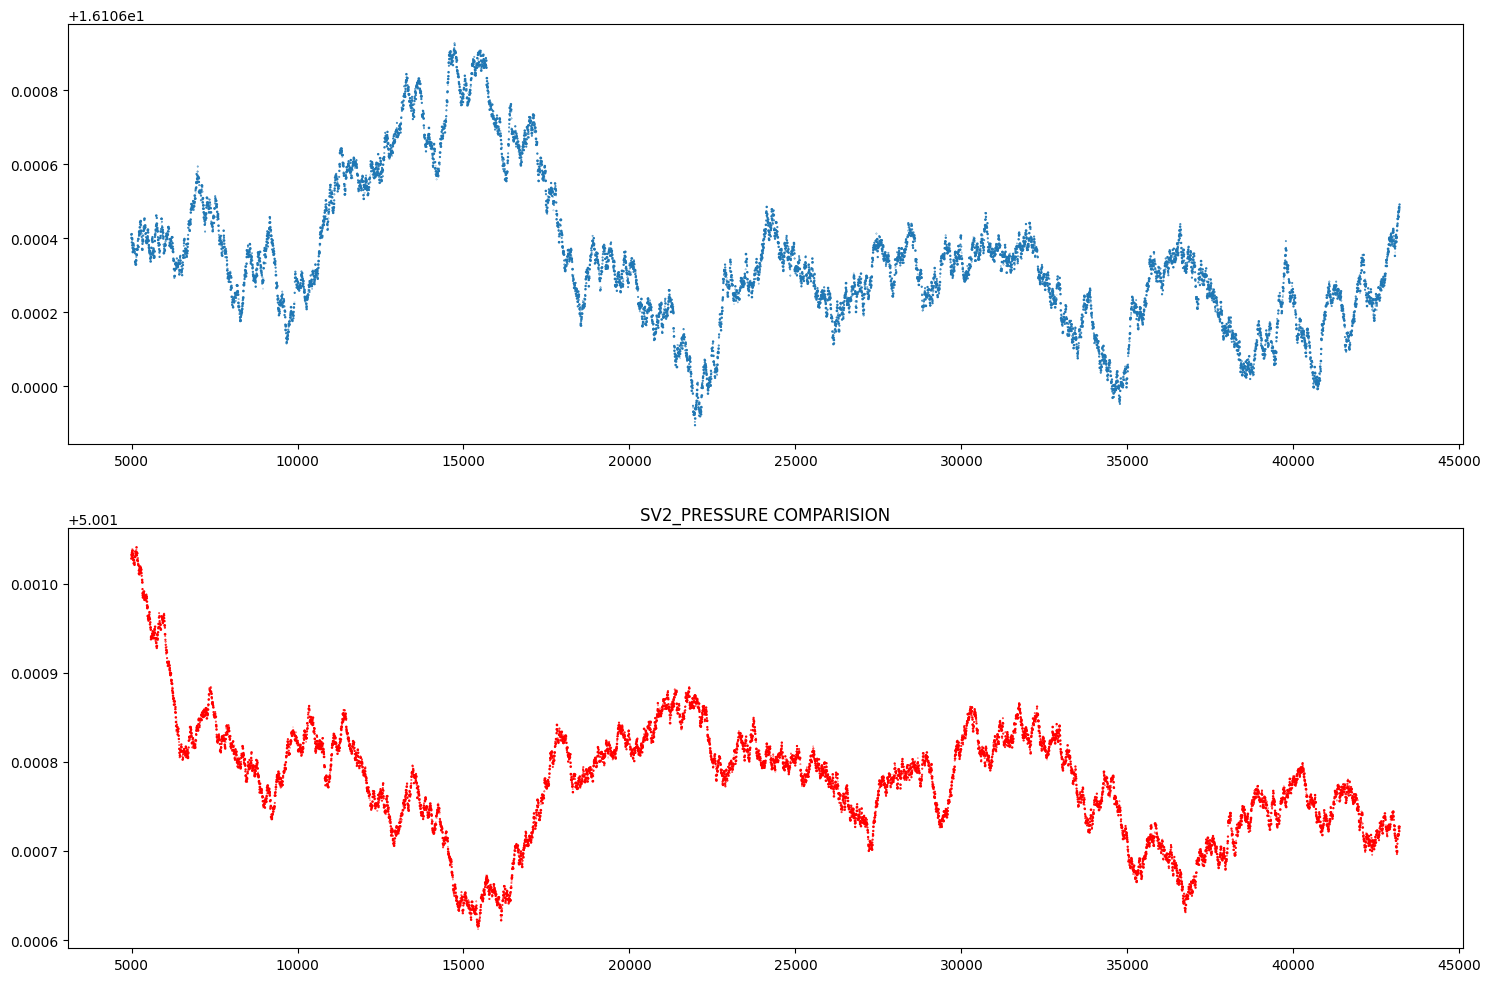

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))
plt.title("SV2_PRESSURE COMPARISION")
ax[0].scatter(x, up_sv2_r, c)
ax[1].scatter(x, down_sv2_r, c,  color= 'red')


### 5. PLOTTING DIfferences wrt to time for Sv1 and sv2

In [ ]:
up_sv1 = df['10-PI-1110']
down_sv1 = df['S1-PT-1001A']

up_sv2 = df['S2-PT-1002A']
down_sv2 = df['20-PT-1312']


Text(0.5, 1.0, 'SV2_diff')

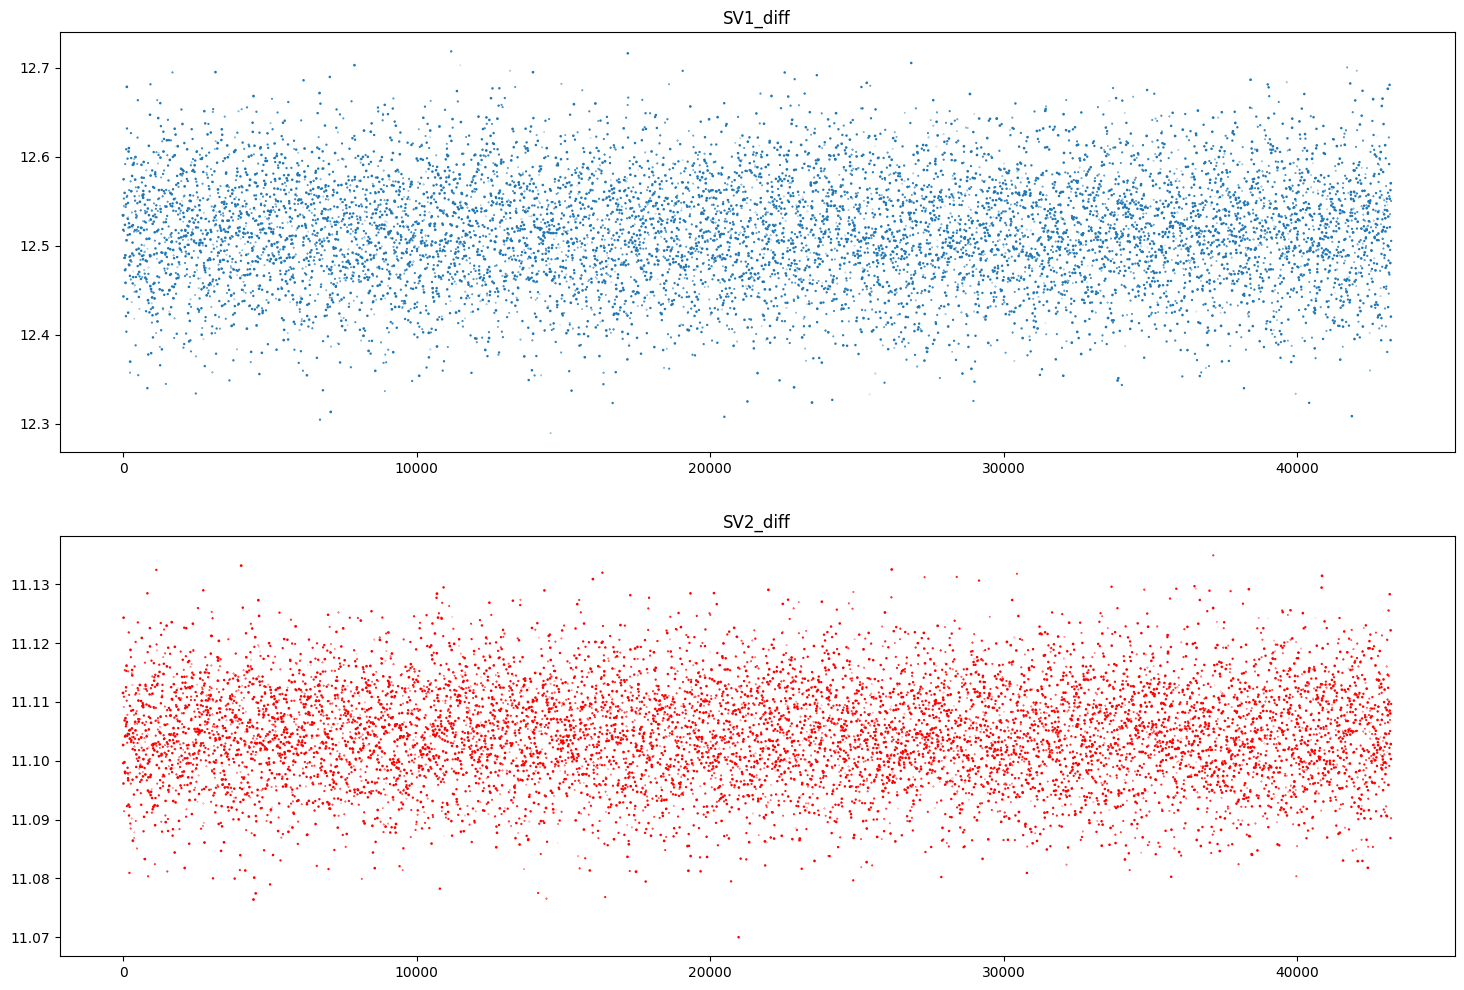

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(18,12))

ax[0].scatter(x, up_sv1 - down_sv1, c)
ax[0].set_title("SV1_diff")
ax[1].scatter(x, up_sv2 - down_sv2, c,  color= 'red')
ax[1].set_title("SV2_diff")

### 6. TRYING TO SPLINE and GEneralize IN STEADY STSE AND CHECK RESULTS FOR FURThER SCOPE WITH SEPERATION BASED ANOMALY DETCETION ALGOTRITHMS

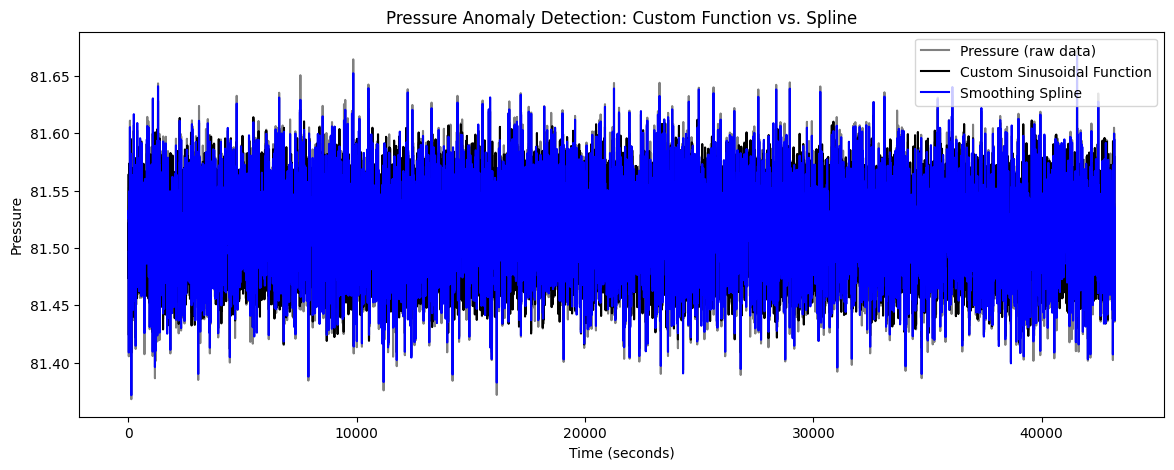

RMSE (Custom Function): 0.042652377808
RMSE (Smoothing Spline): 0.010759512550
NUMBER OF SPLINE ANOMALIES : 8641
NUMBER OF SIN ANOMLIES : 8641


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline, make_interp_spline


# Build smoothing spline
spline_smooth = UnivariateSpline(x, y, s=1)  # smoothing factor tuned to dataset
y_spline = spline_smooth(x)

# Your custom sinusoidal model (on same grid)
checky_sin = np.multiply(
    np.sqrt(([np.mean(y)] * len(x)) + (np.sin(0.9 * x) * np.std(y) * 2.5)),
    np.sqrt(y_spline)  
)

# Residuals (errors)
residuals_sin = y - checky_sin
residuals_spline = y - y_spline

# Threshold anomalies (2 sigma rule)
thresh_sin = 2 * np.std(residuals_sin)
thresh_spline = 2 * np.std(residuals_spline)

anomalies_sin = np.abs(residuals_sin) > thresh_sin
anomalies_spline = np.abs(residuals_spline) > thresh_spline

# Plot everything
plt.figure(figsize=(14, 5))
plt.plot(x, y, label="Pressure (raw data)", color="gray")
plt.plot(x, checky_sin, label="Custom Sinusoidal Function", color="black")
plt.plot(x, y_spline, label="Smoothing Spline", color="blue")
# plt.scatter(x[anomalies_sin], y[anomalies_sin], color="orange", marker="x", s=80, label="Anomalies (sin model)")
# plt.scatter(x[anomalies_spline][:100], y[anomalies_spline][:100], color="purple", marker="o", s=80, facecolors="none", label="Anomalies (spline)")
plt.xlabel("Time (seconds)")
plt.ylabel("Pressure")
plt.title("Pressure Anomaly Detection: Custom Function vs. Spline")
plt.legend()
plt.show()

# Print RMSE comparison
rmse_sin = np.sqrt(np.mean(residuals_sin**2))
rmse_spline = np.sqrt(np.mean(residuals_spline**2))
print(f"RMSE (Custom Function): {rmse_sin:.12f}")
print(f"RMSE (Smoothing Spline): {rmse_spline:.12f}")
print(f"NUMBER OF SPLINE ANOMALIES : {len(anomalies_spline)}")
print(f"NUMBER OF SIN ANOMLIES : {len(anomalies_sin)}")


8641


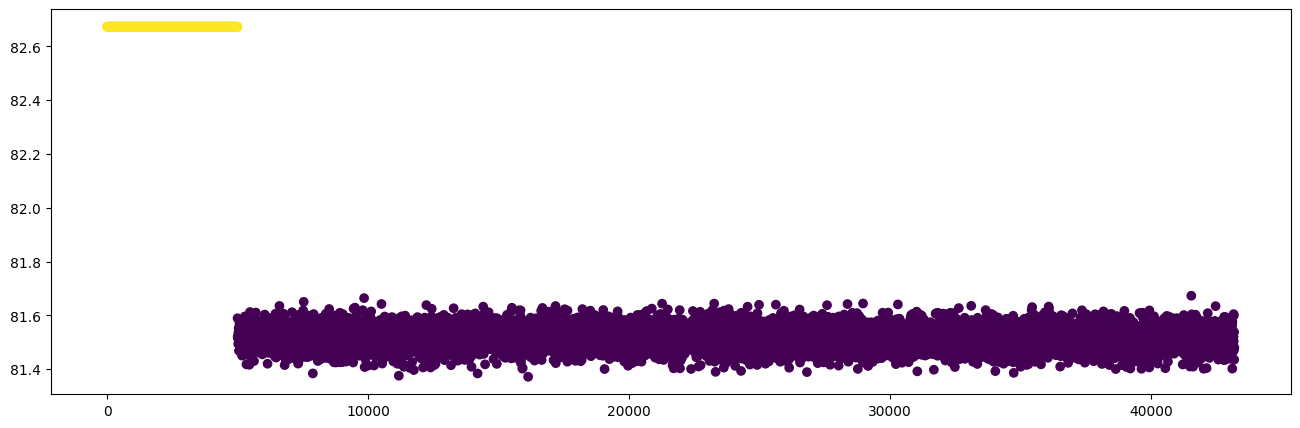

In [48]:
from scipy import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
y_in = [max(y) + 1] * 1000 + list(y[1000:])

print(len(y))

model = KMeans(n_clusters=2)
y_s = np.array(y_in).reshape(-1, 1)

model.fit(y_s)

label = model.predict(y_s)
plt.figure(figsize=(16, 5))
plt.scatter(x, y_s, c=label)

